In [1]:
# Part 1: Setup and Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot settings
sns.set_theme(style='whitegrid')  # This is the correct way to set seaborn style
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

In [2]:
# Part 2: Load and Examine Data
# Load the preprocessed dataset
df = pd.read_csv('../3_Data_Analysis/news_with_sentiment.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample of numerical features:")
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print(df[numerical_features].describe())

Dataset shape: (38043, 22)

Columns: ['title', 'text', 'subject', 'date', 'label', 'text_length', 'title_length', 'exclamation_density', 'question_density', 'quotes_density', 'capitalized_ratio', 'all_caps_ratio', 'special_chars_density', 'avg_sentence_length', 'sentence_length_std', 'num_sentences', 'polarity', 'subjectivity', 'sentiment_std', 'max_polarity', 'min_polarity', 'sentiment_category']

Sample of numerical features:
              label   text_length  title_length  exclamation_density  \
count  38043.000000  38043.000000  38043.000000              38043.0   
mean       0.552717   1637.505559     61.274794                  0.0   
std        0.497220   1033.058153     16.979319                  0.0   
min        0.000000     50.000000      8.000000                  0.0   
25%        0.000000    919.000000     51.000000                  0.0   
50%        1.000000   1512.000000     58.000000                  0.0   
75%        1.000000   2094.000000     68.000000                 

In [3]:
# Part 3: Feature Selection and Preparation
# Select features for modeling
feature_columns = [
    # Text length features
    'text_length', 'title_length',
    
    # Stylometric features
    'exclamation_density', 'question_density', 'quotes_density',
    'capitalized_ratio', 'all_caps_ratio', 'special_chars_density',
    
    # Sentence structure features
    'avg_sentence_length', 'sentence_length_std', 'num_sentences',
    
    # Sentiment features
    'polarity', 'subjectivity', 'sentiment_std',
    'max_polarity', 'min_polarity'
]

# Prepare feature matrix X and target variable y
X = df[feature_columns]
y = df['label']

# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())

# Convert target labels to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display feature statistics after scaling
print("\nFeature statistics after scaling:")
print(X_scaled.describe())

Missing values in features:
text_length              0
title_length             0
exclamation_density      0
question_density         0
quotes_density           0
capitalized_ratio        0
all_caps_ratio           0
special_chars_density    0
avg_sentence_length      0
sentence_length_std      0
num_sentences            0
polarity                 0
subjectivity             0
sentiment_std            0
max_polarity             0
min_polarity             0
dtype: int64

Feature statistics after scaling:
        text_length  title_length  exclamation_density  question_density  \
count  3.804300e+04  3.804300e+04              38043.0           38043.0   
mean   9.263970e-17 -1.434421e-16                  0.0               0.0   
std    1.000013e+00  1.000013e+00                  0.0               0.0   
min   -1.536725e+00 -3.137670e+00                  0.0               0.0   
25%   -6.955223e-01 -6.051438e-01                  0.0               0.0   
50%   -1.214909e-01 -1.928721e-01   

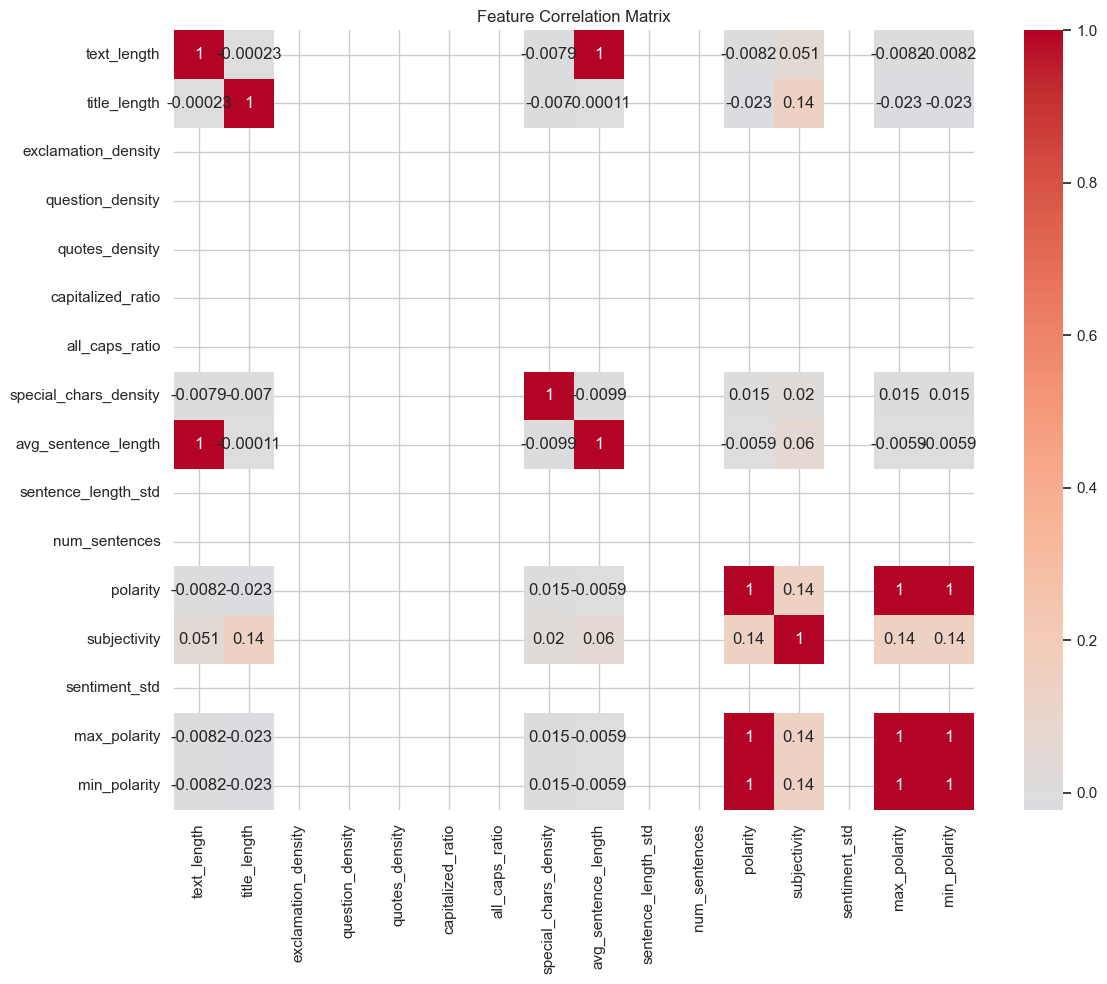

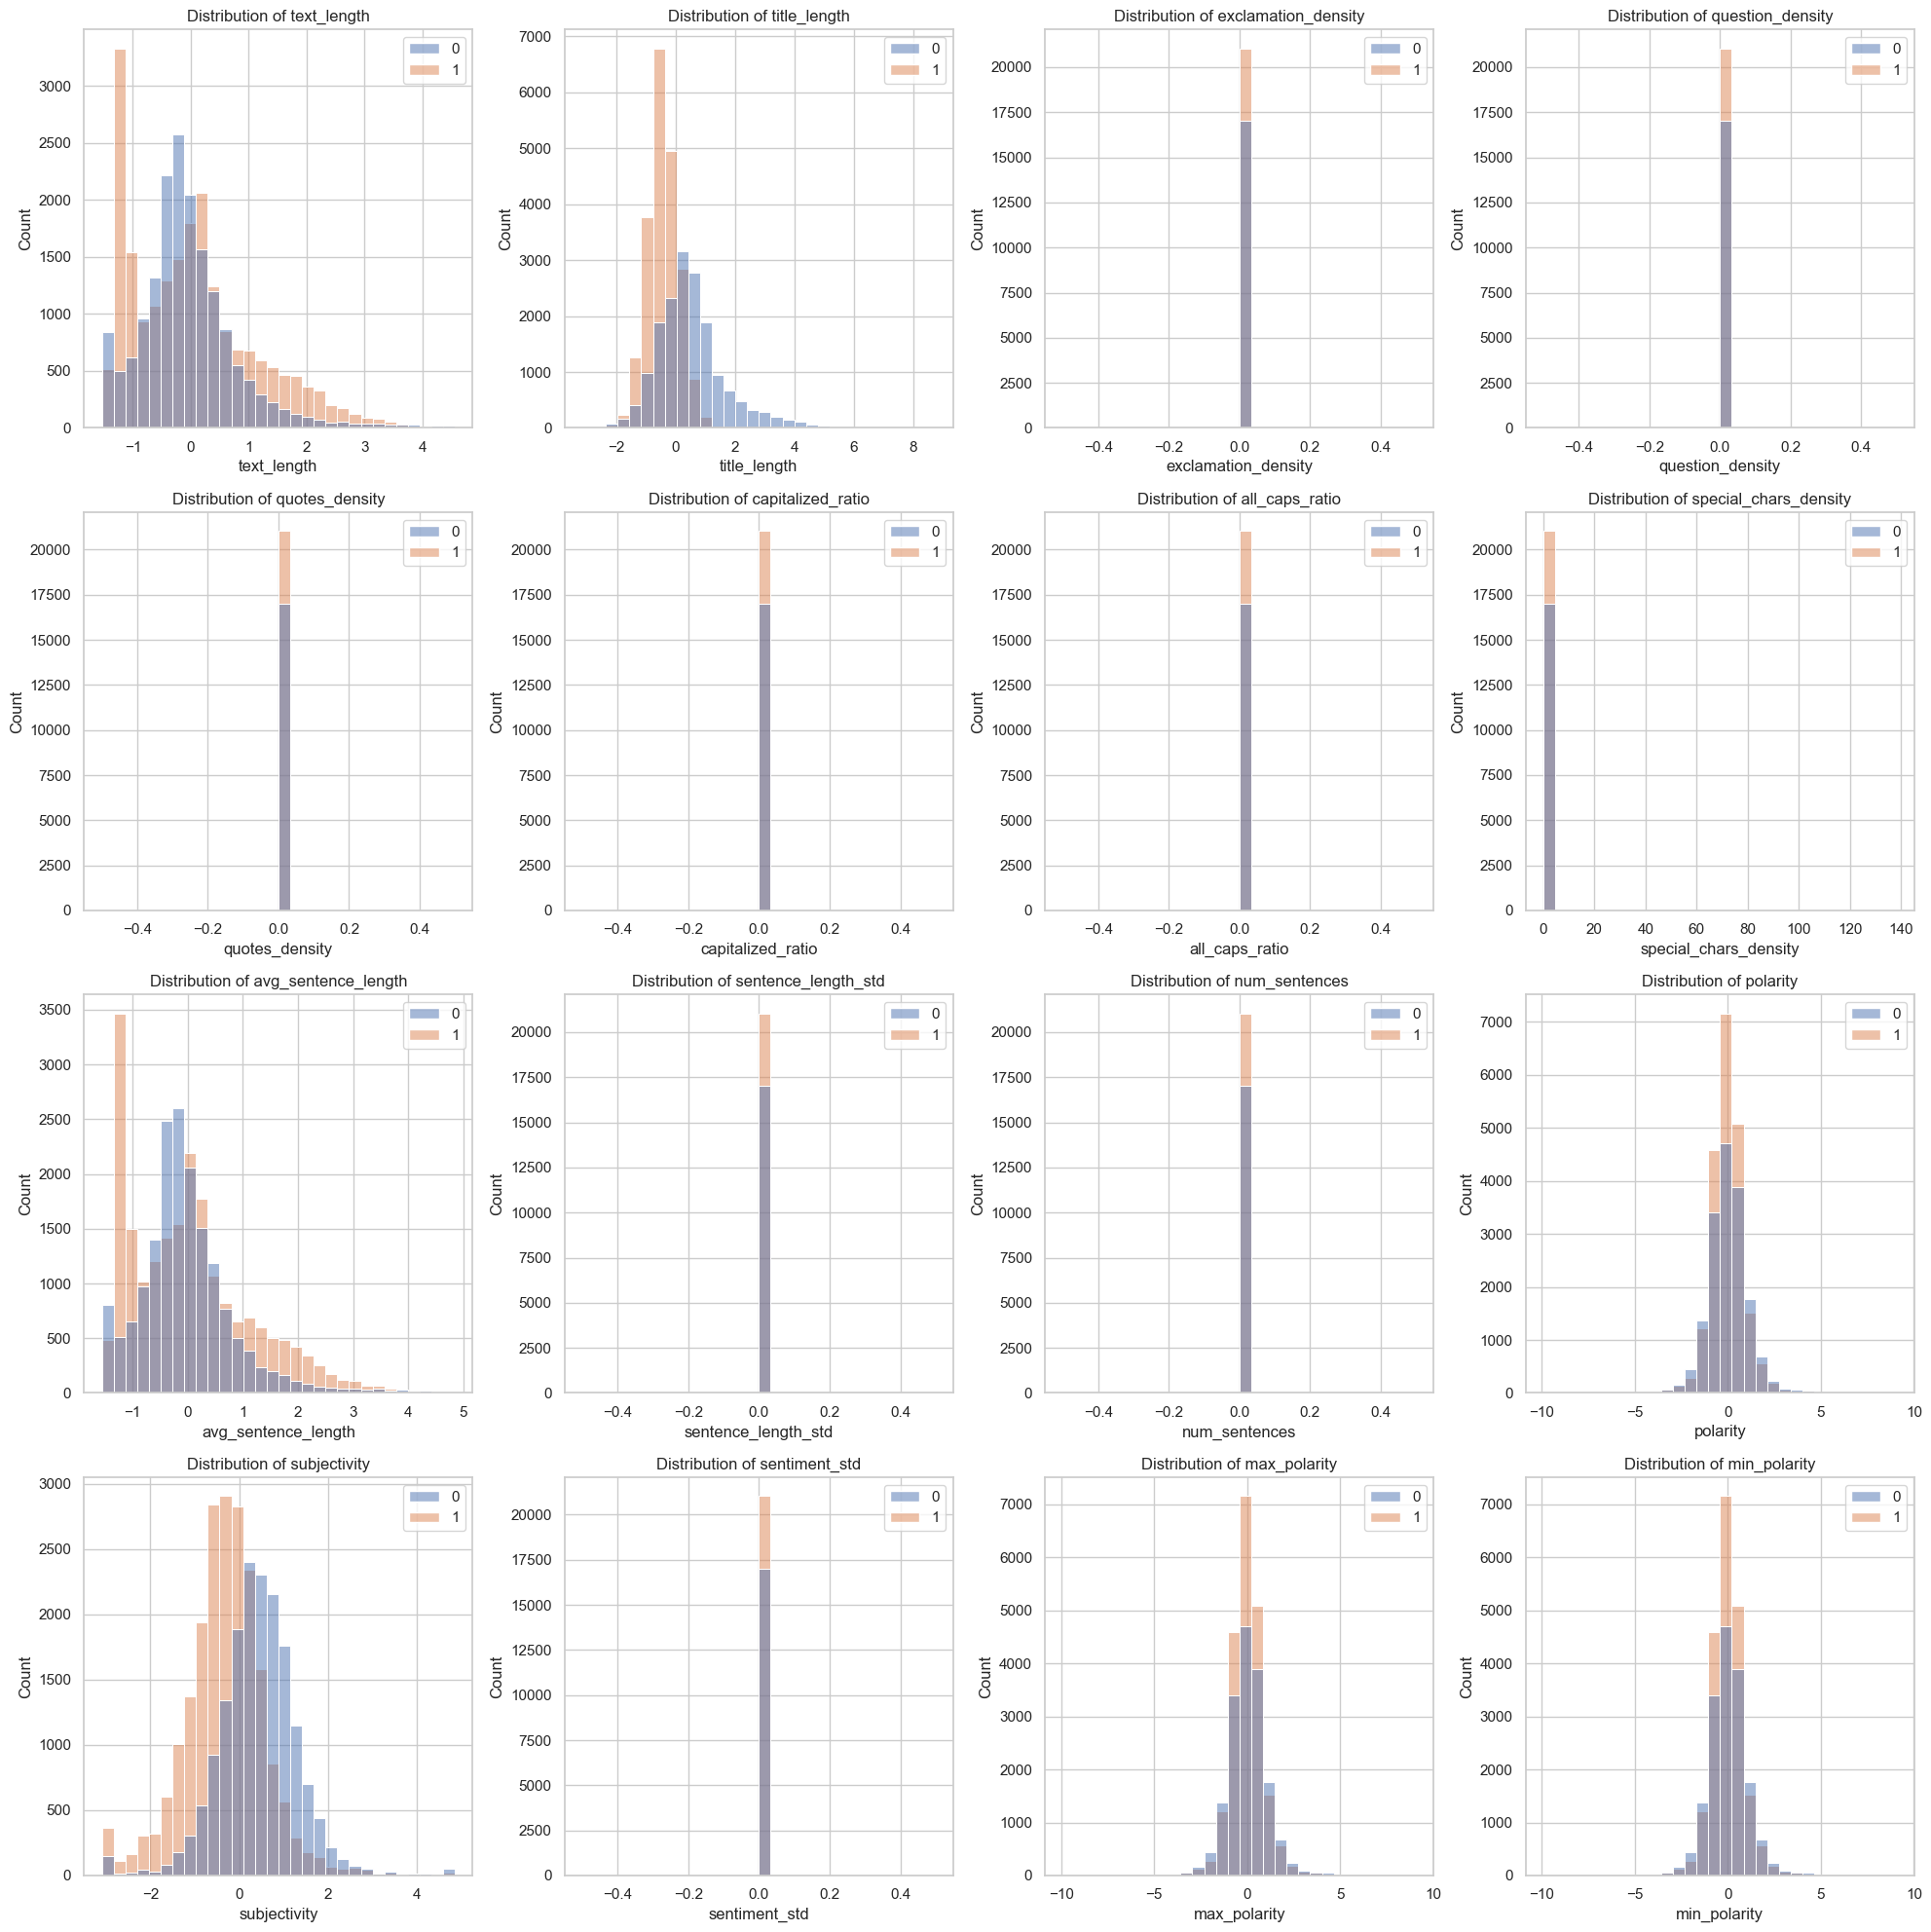

In [4]:
# Part 4: Feature Analysis
# Create correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Plot feature distributions
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()

for idx, column in enumerate(X_scaled.columns):
    if idx < len(axes):
        sns.histplot(data=X_scaled, x=column, hue=y, ax=axes[idx], bins=30)
        axes[idx].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [5]:
# Part 5: Data Splitting
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Display class distribution
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Training set shape: (30434, 16)
Testing set shape: (7609, 16)

Class distribution in training set:
1    0.552704
0    0.447296
Name: proportion, dtype: float64

Class distribution in test set:
1    0.552766
0    0.447234
Name: proportion, dtype: float64


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

        Real       0.80      0.73      0.76      3403
        Fake       0.80      0.85      0.82      4206

    accuracy                           0.80      7609
   macro avg       0.80      0.79      0.79      7609
weighted avg       0.80      0.80      0.80      7609



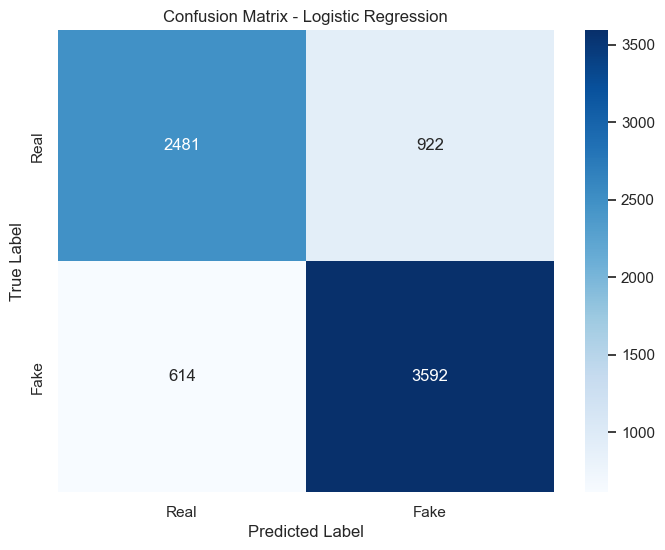

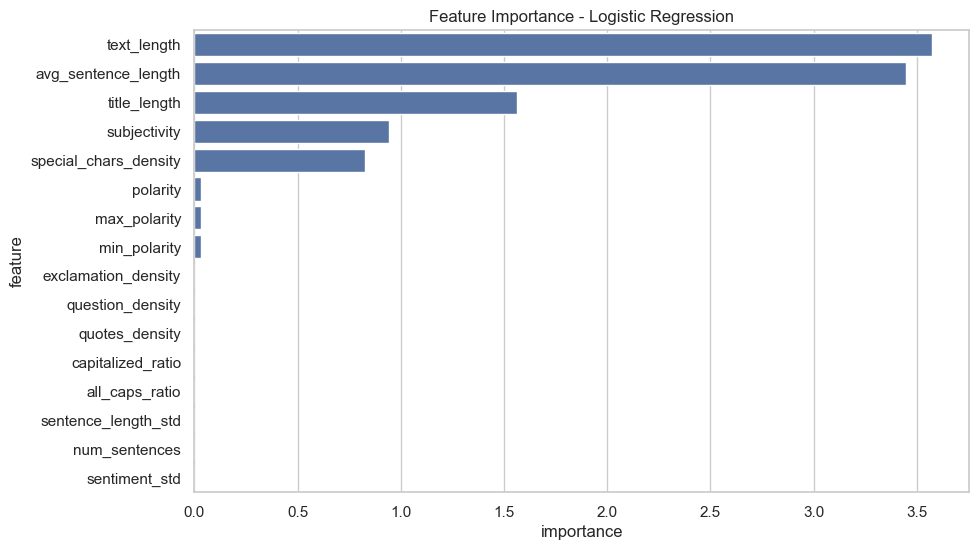

In [7]:
# Part 6: Logistic Regression Model
# Train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Print model evaluation
print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, 
                          target_names=['Real', 'Fake']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

        Real       0.82      0.77      0.80      3403
        Fake       0.83      0.87      0.85      4206

    accuracy                           0.83      7609
   macro avg       0.83      0.82      0.82      7609
weighted avg       0.83      0.83      0.82      7609



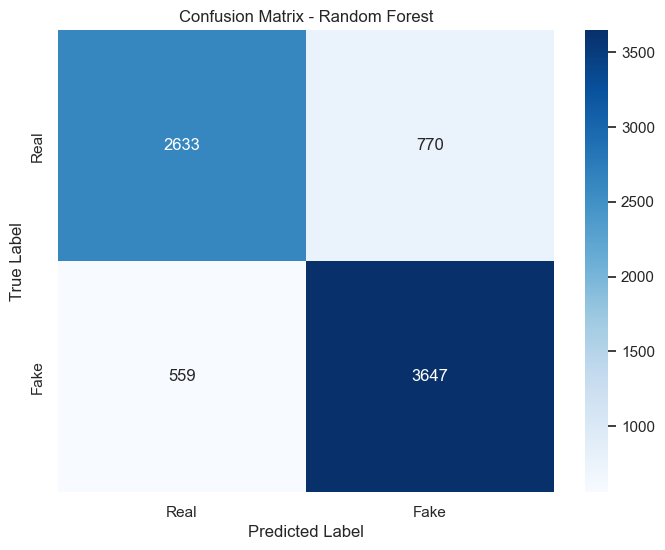

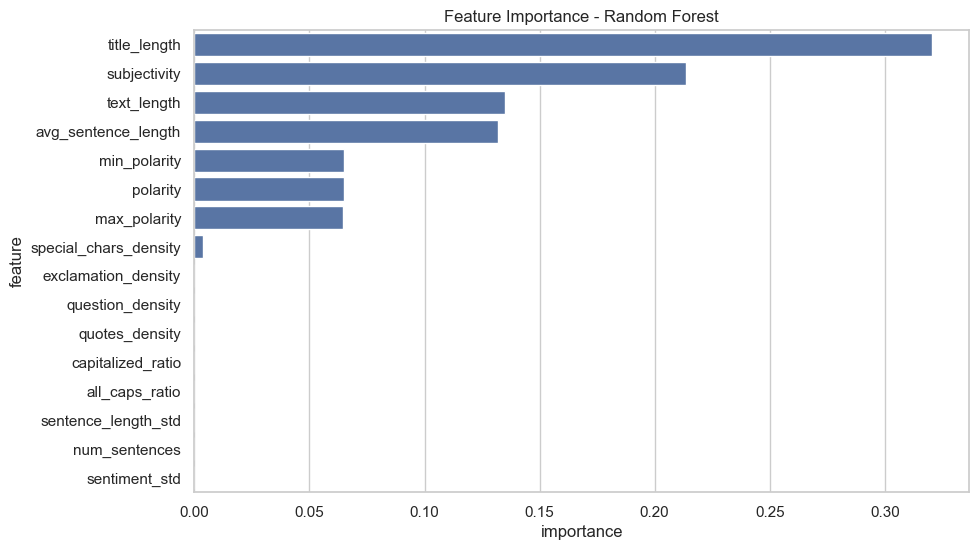

In [9]:
# Part 7: Random Forest Model
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Print model evaluation
print("Random Forest Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Real', 'Fake']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_rf, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.show()

Top 5 Most Important Features:

Logistic Regression:
1. text_length
2. avg_sentence_length
3. title_length
4. subjectivity
5. special_chars_density

Random Forest:
1. title_length
2. subjectivity
3. text_length
4. avg_sentence_length
5. min_polarity


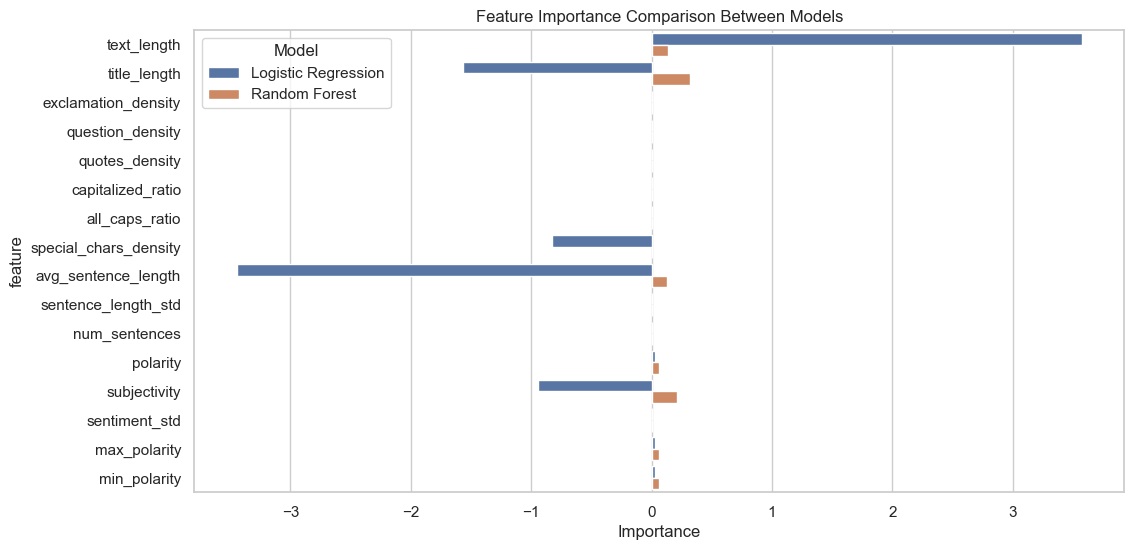

In [10]:
# Part 8: Model Comparison
# Compare feature importance rankings
lr_features = feature_importance['feature'].tolist()
rf_features = feature_importance_rf['feature'].tolist()

print("Top 5 Most Important Features:")
print("\nLogistic Regression:")
for idx, feature in enumerate(lr_features[:5], 1):
    print(f"{idx}. {feature}")

print("\nRandom Forest:")
for idx, feature in enumerate(rf_features[:5], 1):
    print(f"{idx}. {feature}")

# Plot feature importance comparison
plt.figure(figsize=(12, 6))
feature_comparison = pd.DataFrame({
    'feature': feature_columns,
    'Logistic Regression': lr_model.coef_[0],
    'Random Forest': rf_model.feature_importances_
})

feature_comparison_melted = pd.melt(
    feature_comparison, 
    id_vars=['feature'], 
    var_name='Model', 
    value_name='Importance'
)

sns.barplot(data=feature_comparison_melted, x='Importance', y='feature', hue='Model')
plt.title('Feature Importance Comparison Between Models')
plt.show()